# MNIST - Classification

<center><img src="https://www.dropbox.com/s/i37mgynkrf1d3vb/supervised_flow_chart.png?raw=1" height=300px width=1000px></img></center>

# 01 : Frame the Problem

We need to build a classifier using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning. 

Whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST. 

Each image is labeled with the digit it represents. Each digit is represented by 28 x 28, each cell representing pixel depth.

# 02 : Obtaining the Data

### Import the Libraries

In [0]:
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Reading the data from CSV File

In [7]:
!wget https://www.dropbox.com/s/lskvhzb0gy8npv9/mnistdata.csv
# comment out the above line if running this in Jupyter
mnist = pd.read_csv("mnistdata.csv")

--2019-04-28 21:39:19--  https://www.dropbox.com/s/lskvhzb0gy8npv9/mnistdata.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lskvhzb0gy8npv9/mnistdata.csv [following]
--2019-04-28 21:39:19--  https://www.dropbox.com/s/raw/lskvhzb0gy8npv9/mnistdata.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc411bca2a52769128052a32a1f9.dl.dropboxusercontent.com/cd/0/inline/Af4YOKs-YPQqt4mlI2xv7CeSdZqW4BUJ1qxLCX1RYYTrCvdq1m85lSwCWaXziIMyOo8voQZK-ttqmEcCaGrmjG_BVULt85vFC7B545TcXrqJ4A/file# [following]
--2019-04-28 21:39:19--  https://uc411bca2a52769128052a32a1f9.dl.dropboxusercontent.com/cd/0/inline/Af4YOKs-YPQqt4mlI2xv7CeSdZqW4BUJ1qxLCX1RYYTrCvdq1m85lSwCWaXziIMyOo8voQZK-ttqmEcCaGrmjG_BVULt85vFC7B545TcXrqJ4A/file
Resolving uc411b

In [8]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, Label to 783
dtypes: int64(785)
memory usage: 419.2 MB


In [9]:
mnist.head()

,Label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y = mnist['Label'] #getting the labels from Data
#mnist.drop('Label',axis=1,inplace = True) #After we drop the Labels we have remaining data.
X = mnist.drop('Label',axis=1)

In [11]:
X.shape

(70000, 784)

In [12]:
type(y)

pandas.core.series.Series

In [13]:
y.shape

(70000,)

In [14]:
28*28 

784

# 03 : Analyze Data

Prepare the Features and Target variables.
To analyze what is the shape of the feature set.

Visualizing a random digit using the Matplotlib Library

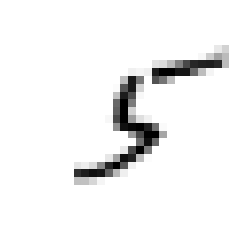

In [16]:
some_digit = X.iloc[35000]
#some_digit_image = some_digit.reshape(28, 28) # to get it into a 2D array  # BL NOTE - DOESN'T WORK
some_digit_image = some_digit.values.reshape(28, 28) # to get it into a 2D array
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show();

In [17]:
some_digit_image.shape

(28, 28)

In [18]:
some_digit_image.max()

254

In [19]:
y[35000]

5

# 04 : Feature Engineering

MNIST data is divided as follows:  
- Train Data - First 60000 rows  
- Test Data - Last 10000 rows  

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

As all the numbers are in the same place, we shuffle them randomly using numpy permutations function

In [0]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [22]:
type(shuffle_index)

numpy.ndarray

# 05-A : Model Selection





### Binary classifier

Instead of prediciting all the classes, we first predict whether a number is '5' or not.  
We create a target test and train variables such that we have True for digits representing '5' and False for digits representing other than '5'.

In [0]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [24]:
y[12607]

1

In [25]:
y_train_5.head(40)

58770    False
40867    False
57782    False
55647    False
57477    False
4507     False
3348     False
44208    False
15648    False
51428    False
10423    False
46117    False
56178    False
8025     False
33214     True
18409    False
52028    False
932      False
34957     True
10387    False
30604     True
24099    False
29545    False
9897     False
24181    False
29839    False
46175    False
26408    False
20883    False
4620     False
32471     True
39121    False
23137    False
53928    False
1861     False
42662    False
27632    False
6886     False
47674    False
17636    False
Name: Label, dtype: bool

### Venkatesh used SGD Classifier for the MNIST digits image classifier
[SciKitLearn - Stocastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

# 06-A : Tune the Model

Predicting the digit for random number.

In [27]:
sgd_clf.predict([some_digit])

array([ True])

Cross Value Score will evaluate the model for each fold and gives us an array representing the accuracy obtained in each fold.

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.

array([0.9081 , 0.96565, 0.96435])

Cross Value Predict will predict the target for each fold and append them into a series.

### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.

In [39]:
y_train_pred.shape

(60000,)

In [40]:
len(y_train_pred)

60000

In [0]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_train_5, y_train_pred)

0.95295

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52667,  1912],
       [  911,  4510]])

In [44]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # When we predict it it be 5, how often are we right? 

0.7022734350669574

In [45]:
recall_score(y_train_5, y_train_pred) # When it is 5, how often do we predict it to be 5?

0.8319498247555801

In [46]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)  # combination of precision and recall

0.761631343409609

# 05-B : Model Selection

### Dummy Classifier

In the train set, only 10% of the rows are labelled to be 5 and remaining are not 5's. So instead of using a model, by using a dummy classifier that give 0 as the prediction for every row, we can obtain 90% accuracy.

In [0]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [0]:
never_5_clf = Never5Classifier()

# 06-B : Tune the Model

### BL NOTE - Venkatesh's intention here is to prove that even if the accuracy score is high (91%), it can still be a worthless model beause the precision score is 0 and recall score is 0.  Precision and recall are usually more important metrics.  The F1 score is a weighted combination of both precision and recall.

In [59]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring="accuracy")

array([0.90925   , 0.90758333, 0.90966667, 0.9095    , 0.91225   ])

In [0]:
predictions = never_5_clf.predict(X_test)

In [61]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [62]:
confusion_matrix(y_test_5,predictions)

array([[9108,    0],
       [ 892,    0]])

In [53]:
accuracy_score(y_test_5,predictions)

0.9108

In [54]:
precision_score(y_test_5,predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [55]:
recall_score(y_test_5,predictions)

0.0

# Precision and Recall Threshold

We study the precision recall relationship using SGD Classifier

<center><img src="https://www.dropbox.com/s/anfhedig7uz35fw/tradeoff.png?raw=1" height=300px width=1000px></img></center>

In [63]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19.

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [65]:
len(precisions)

59822

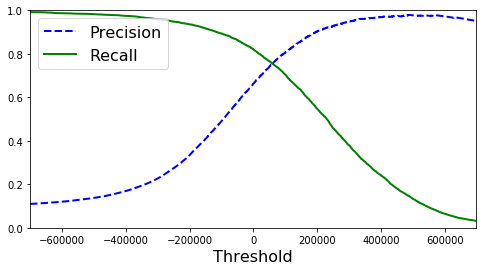

In [66]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

# 05-C : Model Selection

### Multiclass classification

Using SGD Classifier for prediciton of 10 classes ([0-9])

In [67]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


array([5])

# 06-C : Tune the Model

In [0]:
y_hat = sgd_clf.predict(X_test)

In [69]:
confusion_matrix(y_test,y_hat)

array([[ 933,    0,    1,    1,    1,    1,   28,    1,   12,    2],
       [   0, 1034,   60,    6,    2,    1,    5,    1,   21,    5],
       [  12,    5,  925,    5,   10,    0,   18,    8,   45,    4],
       [   6,    0,   45,  883,    6,   16,    5,    8,   27,   14],
       [   3,    0,    4,    3,  905,    0,    8,    0,   20,   39],
       [  12,    2,    4,   45,   35,  627,   33,   16,   94,   24],
       [   6,    3,    4,    1,    6,    2,  919,    0,   17,    0],
       [   3,    2,   23,    2,   17,    0,    1,  891,    8,   81],
       [   7,   13,   25,   39,   61,    6,   15,   14,  764,   30],
       [   4,    4,    2,    8,   59,    2,    4,   11,   19,  896]])

In [70]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-415442.50049139, -108357.1330466 , -147063.17807734,
        -212625.63731469,   11800.67876137,   74727.79638241,
        -344276.95757053, -209897.08191179,  -67778.16195255,
        -403375.69259907]])

In [71]:
np.argmax(some_digit_scores)

5

In [72]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
sgd_clf.classes_[5]

5

# 05-E : Model Selection

### Random Forest Classifier

Using Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5])

# 06-E : Tune the Model

In [75]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0.1, 0. ]])

In [0]:
forest_clf_predictions = forest_clf.predict(X_test)

In [77]:
accuracy_score(y_test,forest_clf_predictions)

0.9473

In [78]:
precision_score(y_test,forest_clf_predictions,average="macro")

0.9471610569426885

In [79]:
recall_score(y_test,forest_clf_predictions,average='macro')

0.9466416648051974

# 05-F : Model Selection

### Multilabel classification using K Neighbors Classifier

Multilabel Classification helps to give multiple labelled predictions for single output.  
For example here the labels are:  
- A number is greater than 7 or not.
- Is a number even or not.


In [80]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [81]:
y_train_large.shape

(60000,)